In [323]:
import math
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
%matplotlib inline

In [324]:
#Read train data from file
train_data = pd.read_csv("train.csv")

In [325]:
#Read train data from file
test_data = pd.read_csv("test.csv")

In [326]:
#Print size of our train matrix
print("Size of train data is {}".format(train_data.shape))

Size of train data is (891, 12)


In [327]:
#Print size of our test matrix
print("Size of test data is {}".format(test_data.shape))

Size of test data is (418, 11)


In [328]:
#You can see 5 first elements in our matrix
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [329]:
import matplotlib.pyplot as plt
%matplotlib inline

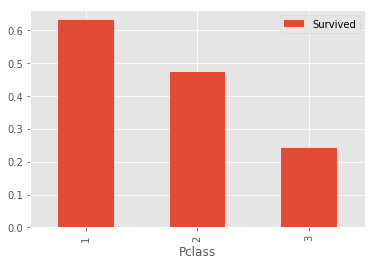

In [330]:
#Draw a histogramm to see survived people at Pclass (first,second,third)
sex_pivot = train_data.pivot_table(index = "Pclass", values = "Survived")
sex_pivot.plot.bar()
plt.show()

In [331]:
#Working with ages
def process_age(df,cut_points,label_names) : 
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels = label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

In [332]:
train_data = process_age(train_data,cut_points,label_names)
test_data = process_age(test_data,cut_points,label_names)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Missing
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Infant
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager


train_data = cabin_features(train_data)
test_data = cabin_features(test_data)

In [333]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train_data = create_dummies(train_data,column)
    test_data = create_dummies(test_data,column)
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,...,1,0,1,1,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,0,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,1,0,1,0,1,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,1,1,0,0,0,0,0,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,0,1,0,0,0


In [334]:
train_data.info()
train_data['Cabin'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
PassengerId                   891 non-null int64
Survived                      891 non-null int64
Pclass                        891 non-null int64
Name                          891 non-null object
Sex                           891 non-null object
Age                           891 non-null float64
SibSp                         891 non-null int64
Parch                         891 non-null int64
Ticket                        891 non-null object
Fare                          891 non-null float64
Cabin                         204 non-null object
Embarked                      889 non-null object
Age_categories                891 non-null category
Pclass_1                      891 non-null uint8
Pclass_2                      891 non-null uint8
Pclass_3                      891 non-null uint8
Sex_female                    891 non-null uint8
Sex_male                      891 non-null uint8
A

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
E101           3
D              3
F33            3
C22 C26        3
D33            2
C78            2
D20            2
E33            2
D17            2
C52            2
C125           2
C68            2
D35            2
C65            2
C83            2
E25            2
E67            2
E24            2
C126           2
B77            2
C124           2
B5             2
F G73          2
B49            2
E8             2
C2             2
              ..
C110           1
B42            1
C82            1
D28            1
F38            1
C70            1
C30            1
D56            1
B102           1
A6             1
B78            1
B69            1
C90            1
T              1
D21            1
C95            1
B73            1
E40            1
C45            1
C148           1
A26            1
E36            1
C91            1
D50            1
E50            1
B94            1
C111           1
C128          

In [335]:
#Working with cabins
import re
def cabin_features(data) :
    features = []
    for cabin in data :
        rooms = []
        numbers_rooms = []
        re.sub("\s\s+", " ",cabin)
        cabins = cabin.split(" ")
        n_cabins = len(cabins)
        if n_cabins > 1 :
            for i in range (n_cabins) :
                cabin_char = cabins[i][0]
                rooms.append(cabin_char)
        else :
            cabin_char = cabins[0][0]
        if cabin_char == "N" :
            n_cabins = 0
        if n_cabins > 1 :
                for i in range (n_cabins) :
                    cabin_num = cabins[i][1:]
                    if len(str(cabin_num)) == 0 :
                        cabin_num = 0
                        numbers_rooms.append(cabin_num)
                    else :
                        cabin_num = int(cabins[i][1:])
                        numbers_rooms.append(cabin_num)
        else :
            cabin_num = cabins[0][1:]
            if len(str(cabin_num)) == 0:
                cabin_num = 0
            else :
                cabin_num = int(cabins[0][1:])
        if n_cabins <= 1 :
            features.append([cabin_char , cabin_num , n_cabins])
        else :
            str1 = ','.join(list(set(rooms)))
            str2 = ', '.join(str(x) for x in numbers_rooms)
            features.append([cabin_char , str2 , n_cabins])
    return features

In [336]:
def select_column_from_matrix(matrix ,index_of_column) :
    result = []
    for i in range(len(matrix)) :
        result.append(matrix[i][index_of_column])
    return result

In [337]:
#Fill a table in train_data
train_cabins_only = train_data[["Cabin"]].copy()
train_cabins_only["Cabins_data"] = train_cabins_only["Cabin"].apply(lambda x : False if x != x  else True )
train_cabins_only["Cabin"] =  train_cabins_only["Cabin"].apply(lambda x : "N" if x != x else x)
train_cabins_only.head(5)

,Cabin,Cabins_data
0,N,False
1,C85,True
2,N,False
3,C123,True
4,N,False


In [338]:
#Fill a table in test data
test_cabins_only = test_data[["Cabin"]].copy()
test_cabins_only["Cabins_data"] = test_cabins_only["Cabin"].apply(lambda x : False if x != x  else True )
test_cabins_only["Cabin"] =  test_cabins_only["Cabin"].apply(lambda x : "N" if x != x else x)
test_cabins_only.head(5)

,Cabin,Cabins_data
0,N,False
1,N,False
2,N,False
3,N,False
4,N,False


In [339]:
features = cabin_features(train_cabins_only["Cabin"])
train_cabins_only["Cabin_char"] = select_column_from_matrix(features,0)
train_cabins_only.head(25)

,Cabin,Cabins_data,Cabin_char
0,N,False,N
1,C85,True,C
2,N,False,N
3,C123,True,C
4,N,False,N
5,N,False,N
6,E46,True,E
7,N,False,N
8,N,False,N
9,N,False,N


In [340]:
test_features = cabin_features(test_cabins_only["Cabin"])
test_cabins_only["Cabin_char"] = select_column_from_matrix(test_features,0)
test_cabins_only.head(40)

,Cabin,Cabins_data,Cabin_char
0,N,False,N
1,N,False,N
2,N,False,N
3,N,False,N
4,N,False,N
5,N,False,N
6,N,False,N
7,N,False,N
8,N,False,N
9,N,False,N


In [341]:
for column in ["Cabins_data"]:
    train_data_cabins = create_dummies(train_cabins_only,column)
    test_data_cabins = create_dummies(test_cabins_only,column)
for column in ["Cabin_char"]:
    train_data_cabins = create_dummies(train_data_cabins,column)
    test_data_cabins = create_dummies(test_data_cabins,column)
train_data_cabins = train_data_cabins.drop(columns = ["Cabins_data", "Cabin_char"])
test_data_cabins = test_data_cabins.drop(columns = ["Cabins_data", "Cabin_char"])

In [342]:
columns1 = ['Cabins_data_False' , 'Cabins_data_True' ,
         'Cabin_char_A', 'Cabin_char_B', 'Cabin_char_C', 'Cabin_char_D',
          'Cabin_char_E' , 'Cabin_char_F' , 'Cabin_char_G' , 'Cabin_char_N']

In [343]:
for column in columns1 :
    train_data[column] = train_data_cabins[column]
    test_data[column] = test_data_cabins[column]

In [344]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabins_data_False,Cabins_data_True,Cabin_char_A,Cabin_char_B,Cabin_char_C,Cabin_char_D,Cabin_char_E,Cabin_char_F,Cabin_char_G,Cabin_char_N
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,0,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,0,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,1,0,0,0,0,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,1,0,0,0,0,0,0,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,1,0,0,0,0,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,1,0,0,0,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,1,0,0,0,0,0,0,0,0,1


In [345]:
from sklearn.linear_model import LogisticRegression

In [346]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Cabins_data_False' , 'Cabins_data_True' ,
         'Cabin_char_A', 'Cabin_char_B', 'Cabin_char_C', 'Cabin_char_D',
          'Cabin_char_E' , 'Cabin_char_F' , 'Cabin_char_G' , 'Cabin_char_N' ]

In [347]:
lr = LogisticRegression()
lr.fit(train_data[columns], train_data["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [348]:
from sklearn.model_selection import train_test_split

all_X = train_data[columns]
all_Y = train_data["Survived"]

train_X, test_X, train_y, test_y = train_test_split(
all_X, all_Y, test_size=0.30,random_state=0)

In [349]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy = ",accuracy)

Accuracy =  0.8134328358208955


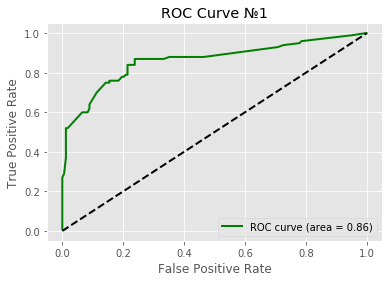

In [388]:
y_predict_probabilities = lr.predict_proba(test_X)[:,1]

fpr, tpr , _ = roc_curve(test_y, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve №1')
plt.legend(loc="lower right")
plt.show()

In [392]:
#Random Forest
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(train_X, train_y)
predictions = rf.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.7947761194029851


In [265]:
#GradientBoosting
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X, train_y)
predictions = gbt.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.8097014925373134


In [266]:
#Support Vector Machine(Classifier)(SVM or SVC)
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_X, train_y)
predictions = gbt.predict(train_X)
accuracy = accuracy_score(train_y, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.8362760834670947


In [354]:
holdout_predictions = lr.predict(test_data[columns])
holdout_ids = test_data["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [382]:
def simple_feature_selection(array) :
    a = array.tolist()
    max_value = max(a)
    result = []
    
    for x in a :
        x = x / max_value
    
    for x in a :
        if x > 0.3 :
            result.append(a.index(x))
            
    return result

In [381]:
array_of_index_features = simple_feature_selection(array_lr)
array_of_index_features

[0, 3, 6, 18]

In [377]:
#Feature Selection(simple)
new_columns = []
for i in array_of_index_features :
    new_columns.append(columns[i])
new_columns

['Pclass_1', 'Sex_female', 'Age_categories_Infant', 'Cabin_char_E']

In [358]:
#LR using new columns(Features Selection)
from sklearn.model_selection import train_test_split

all_X1 = train_data[new_columns]
all_Y1 = train_data["Survived"]

train_X1, test_X1, train_y1, test_y1 = train_test_split(
all_X1, all_Y1, test_size=0.30,random_state=0)

In [361]:
from sklearn.metrics import accuracy_score

lr1 = LogisticRegression()
lr1.fit(train_X1, train_y1)
predictions = lr1.predict(test_X1)
accuracy = accuracy_score(test_y1, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.7835820895522388


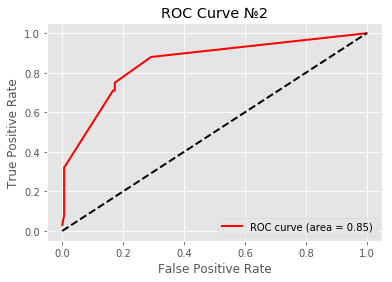

In [391]:
y_predict_probabilities1 = lr1.predict_proba(test_X1)[:,1]

fpr1, tpr1 , _ = roc_curve(test_y1, y_predict_probabilities1)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
plt.plot(fpr1, tpr1, color = 'red',
         lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color = 'black', lw = 2 , linestyle = '--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve №2')
plt.legend(loc = "lower right")
plt.show()

In [383]:
holdout_predictions = lr1.predict(test_data[new_columns])
holdout_ids = test_data["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [384]:
submission.to_csv("submission.csv",index=False)